<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#&quot;De-Witte-Juffer&quot;" data-toc-modified-id="&quot;De-Witte-Juffer&quot;-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>"De Witte Juffer"</a></span></li></ul></li><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Missing data</a></span><ul class="toc-item"><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Autocorrelation</a></span></li><li><span><a href="#Partial-autocorrelation-and-the-partial-autocorrelation-function-(PACF)" data-toc-modified-id="Partial-autocorrelation-and-the-partial-autocorrelation-function-(PACF)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Partial autocorrelation and the partial autocorrelation function (PACF)</a></span></li><li><span><a href="#Differencing-a-time-series-and-stationarity" data-toc-modified-id="Differencing-a-time-series-and-stationarity-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Differencing a time series and stationarity</a></span></li><li><span><a href="#Difference-the-unemployment-rate-and-plot" data-toc-modified-id="Difference-the-unemployment-rate-and-plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Difference the unemployment rate and plot</a></span></li><li><span><a href="#White-Noise" data-toc-modified-id="White-Noise-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>White Noise</a></span></li></ul></li></ul></div>

In [1]:
from datetime import datetime
now = datetime.now()
print(f'Time right now: {now}')
print("Micro-Second", now.microsecond)
print("Second", now.second)
print("Minute", now.minute)
print("Hour", now.hour)
print("Day", now.day)
print("Month",now.month)
print("Year", now.year)
now_ = datetime.now()
print(f'Creating a new object means an new time: {now_.microsecond}')

Time right now: 2019-02-20 14:23:57.990834
Micro-Second 990834
Second 57
Minute 23
Hour 14
Day 20
Month 2
Year 2019
Creating a new object means an new time: 991379


In [2]:
# Import timedelta from datetime library
from datetime import timedelta

# Time deltas represent time as an amount as opposed to a fixed position.
offset = timedelta(days=1, seconds=20)

# the time delta has attributes that allow us to extract values from it.
print('offset days', offset.days)
print('offset seconds', offset.seconds)
print('offset microseconds', offset.microseconds)

offset days 1
offset seconds 20
offset microseconds 0


In [3]:
print("Future: ", now + offset)
print("Past: ", now - offset)

Future:  2019-02-21 14:24:17.990834
Past:  2019-02-19 14:23:37.990834


> Note: The largest value a Time Delta can hold is 'Days'. I.e. you can't say your want you an offset to be 2 years, 44 days and 12 hours. You would have to manually convert the time of those years to be represented in days.

### "De Witte Juffer" 
Is the windmill I co-own. Data contains the daily production in kWh (Kilowatts per hour)

<a href="https://www.google.com/maps/place/51°56'06.5%22N+5°11'45.1%22E/@51.9351513,5.1936603,627m/data=!3m2!1e3!4b1!4m14!1m7!3m6!1s0x47c659d3f36f1d29:0x62994c3ce6a3f292!2sProvincialeweg,+4107+Culemborg!3b1!8m2!3d51.934967!4d5.2040136!3m5!1s0x0:0x0!7e2!8m2!3d51.9351482!4d5.1958486">De Witte Juffer on Google Maps</a>


In [77]:
# Get my  dataset from my GitHub
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MaartenKool/CookBooks-Sources/master/DeWitteJuffer.csv', sep=';')
df.shape

(1838, 5)

In [78]:
df.columns

Index(['Molen', 'Datum', 'Totale productie (kWh)', 'Per winddeel (kWh)',
       '9 Winddelen (kWh)'],
      dtype='object')

In [79]:
#define DataFrame
df['kWh'] = df['Totale productie (kWh)']
df = df[['Datum', 'kWh']]
df.drop([0], axis = 0, inplace = True) #first record is empty


In [80]:
df.dtypes

Datum    object
kWh       int64
dtype: object

In [81]:
#Convert date to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

In [82]:
df.dtypes

Datum    datetime64[ns]
kWh               int64
dtype: object

In [83]:
#Make date the index
df.index = df['Datum']

In [84]:
#equivalent in 1 go
df.index = pd.to_datetime(df['Datum'])

In [85]:
df.describe()

,kWh
count,1837.000000
mean,8679.555797
std,9000.244003
min,-234.000000
25%,2420.000000
50%,5351.000000
75%,11901.000000
max,46138.000000


In [86]:
# add date elements to df in seperate columns 
df['day'] = df['Datum'].dt.day
df['month'] = df['Datum'].dt.month
df['year'] = df['Datum'].dt.year
df['dayname'] = df['Datum'].dt.day_name() #[:5]
df['monthyear'] = (df['year'].astype(str) + df['month'].astype(str)).astype(int)

In [87]:
df.head()

,Datum,kWh,day,month,year,dayname,monthyear
Datum,,,,,,,
2019-01-11,2019-01-11,7644,11,1,2019,Friday,20191
2019-01-10,2019-01-10,2698,10,1,2019,Thursday,20191
2019-01-09,2019-01-09,20922,9,1,2019,Wednesday,20191
2019-01-08,2019-01-08,38468,8,1,2019,Tuesday,20191
2019-01-07,2019-01-07,17742,7,1,2019,Monday,20191


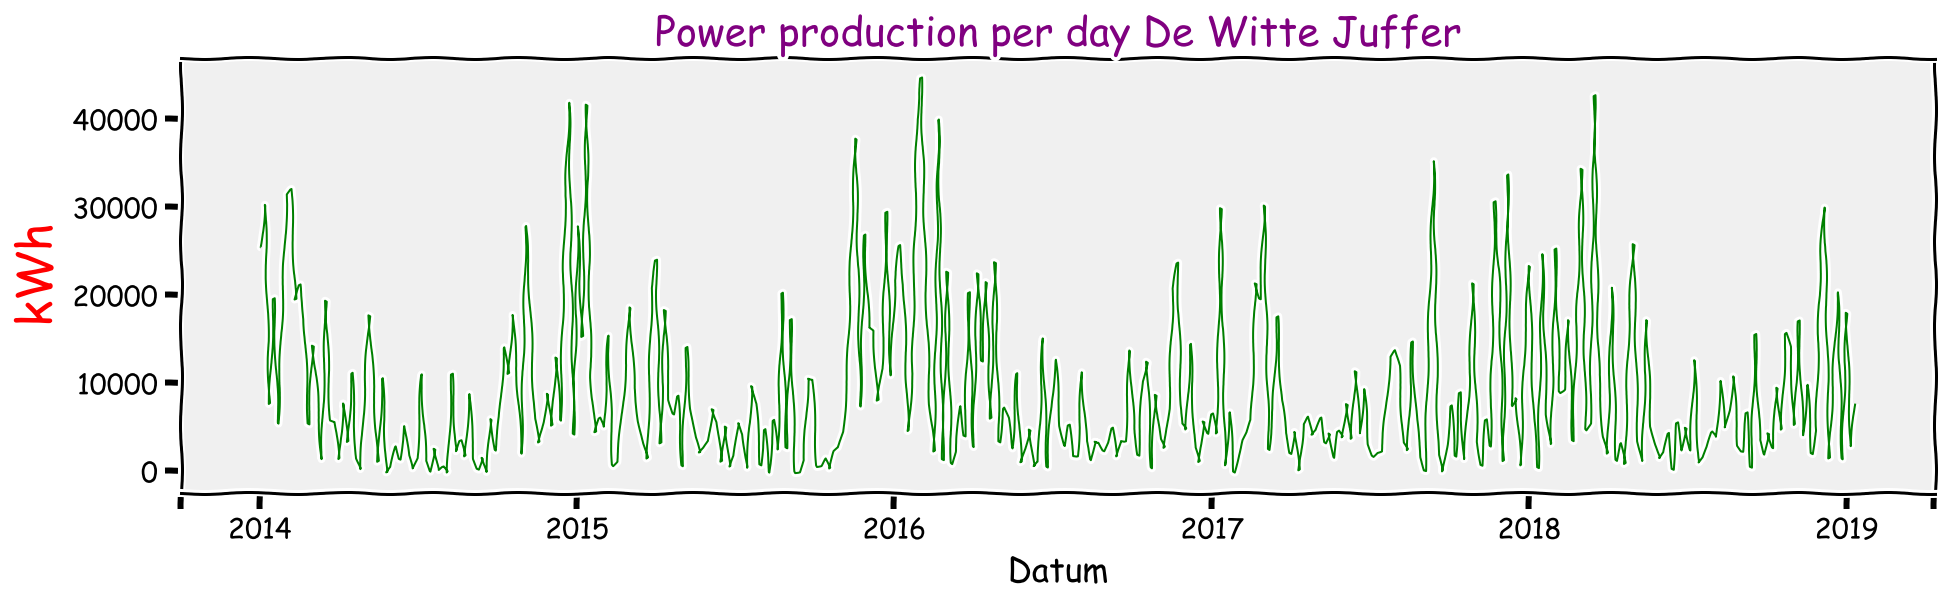

In [88]:
# playfull plot of production
with plt.xkcd(randomness=2):
    df['kWh'][::5].plot(figsize=(14,4), lw=1, color='green' ); #plotting every 5th for readability
    plt.ylabel('kWh', fontsize=24, color='red')
    plt.title('Power production per day De Witte Juffer', color='purple')

## Missing data

Missing data can obviously occur in a time series

In [89]:
# create some missing data
df.drop(df.index[1:10:2], inplace=True)

In [90]:
df.head()

,Datum,kWh,day,month,year,dayname,monthyear
Datum,,,,,,,
2019-01-11,2019-01-11,7644,11,1,2019,Friday,20191
2019-01-09,2019-01-09,20922,9,1,2019,Wednesday,20191
2019-01-07,2019-01-07,17742,7,1,2019,Monday,20191
2019-01-05,2019-01-05,13408,5,1,2019,Saturday,20191
2019-01-03,2019-01-03,3386,3,1,2019,Thursday,20191


In [91]:
#check for missing dates
start = df['Datum'].min()
end = df['Datum'].max()
daterange = pd.date_range(start, end)
daterange.difference(df.index)
#or
#pd.date_range(start, end).difference(df.index)


#  = pd.date_range(start, end)


# 

DatetimeIndex(['2019-01-02', '2019-01-04', '2019-01-06', '2019-01-08',
               '2019-01-10'],
              dtype='datetime64[ns]', freq=None)

In [92]:
#add missing dates
df.reindex(daterange) #filling with NaN

# df = df.reindex(daterange, fill_value=0) #filling with a specific value



,Datum,kWh,day,month,year,dayname,monthyear
2014-01-01,2014-01-01,26606.0,1.0,1.0,2014.0,Wednesday,20141.0
2014-01-02,2014-01-02,25389.0,2.0,1.0,2014.0,Thursday,20141.0
2014-01-03,2014-01-03,34530.0,3.0,1.0,2014.0,Friday,20141.0
2014-01-04,2014-01-04,20544.0,4.0,1.0,2014.0,Saturday,20141.0
2014-01-05,2014-01-05,15473.0,5.0,1.0,2014.0,Sunday,20141.0
2014-01-06,2014-01-06,37101.0,6.0,1.0,2014.0,Monday,20141.0
2014-01-07,2014-01-07,30226.0,7.0,1.0,2014.0,Tuesday,20141.0
2014-01-08,2014-01-08,17382.0,8.0,1.0,2014.0,Wednesday,20141.0
2014-01-09,2014-01-09,30935.0,9.0,1.0,2014.0,Thursday,20141.0
2014-01-10,2014-01-10,9204.0,10.0,1.0,2014.0,Friday,20141.0


In [93]:
# df['Datum'] = pd.DatetimeIndex(df.index)
#df.reindex(daterange)
df.reindex(pd.date_range(start, end)).isnull().all(1)[df.reindex(pd.date_range(start, end)).isnull().all(1) == True]


2019-01-02    True
2019-01-04    True
2019-01-06    True
2019-01-08    True
2019-01-10    True
dtype: bool

In [47]:
df.head()

,Datum,kWh
Datum,,
2019-01-11,2019-01-11,7644
2019-01-07,2019-01-07,17742
2019-01-05,2019-01-05,13408
2019-01-03,2019-01-03,3386
2019-01-01,2019-01-01,17964


In [38]:
# https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe

# Insert missing dates in the index

start = df['Datum'].min()

end = df['Datum'].max()

daterange = pd.date_range(start, end)


df.set_index(df['Datum'],drop=True,inplace=True)
df.index = pd.DatetimeIndex(df.index)
df = df.reindex(daterange,fill_value=0)
df['Datum'] = pd.DatetimeIndex(df.index)

df.tail()

,Datum,kWh,day,month,year,dayname,monthyear
2019-01-07,2019-01-07,17742,7,1,2019,Monday,20191
2019-01-08,2019-01-08,0,0,0,0,0,0
2019-01-09,2019-01-09,20922,9,1,2019,Wednesday,20191
2019-01-10,2019-01-10,0,0,0,0,0,0
2019-01-11,2019-01-11,7644,11,1,2019,Friday,20191


In [39]:
df['Datum'] = pd.to_datetime(df['Datum'])
df.index = pd.to_datetime(df['Datum'])
df = df.resample('D').mean()

In [40]:
df.tail()

,kWh,day,month,year,monthyear
Datum,,,,,
2019-01-07,17742,7,1,2019,20191
2019-01-08,0,0,0,0,0
2019-01-09,20922,9,1,2019,20191
2019-01-10,0,0,0,0,0
2019-01-11,7644,11,1,2019,20191


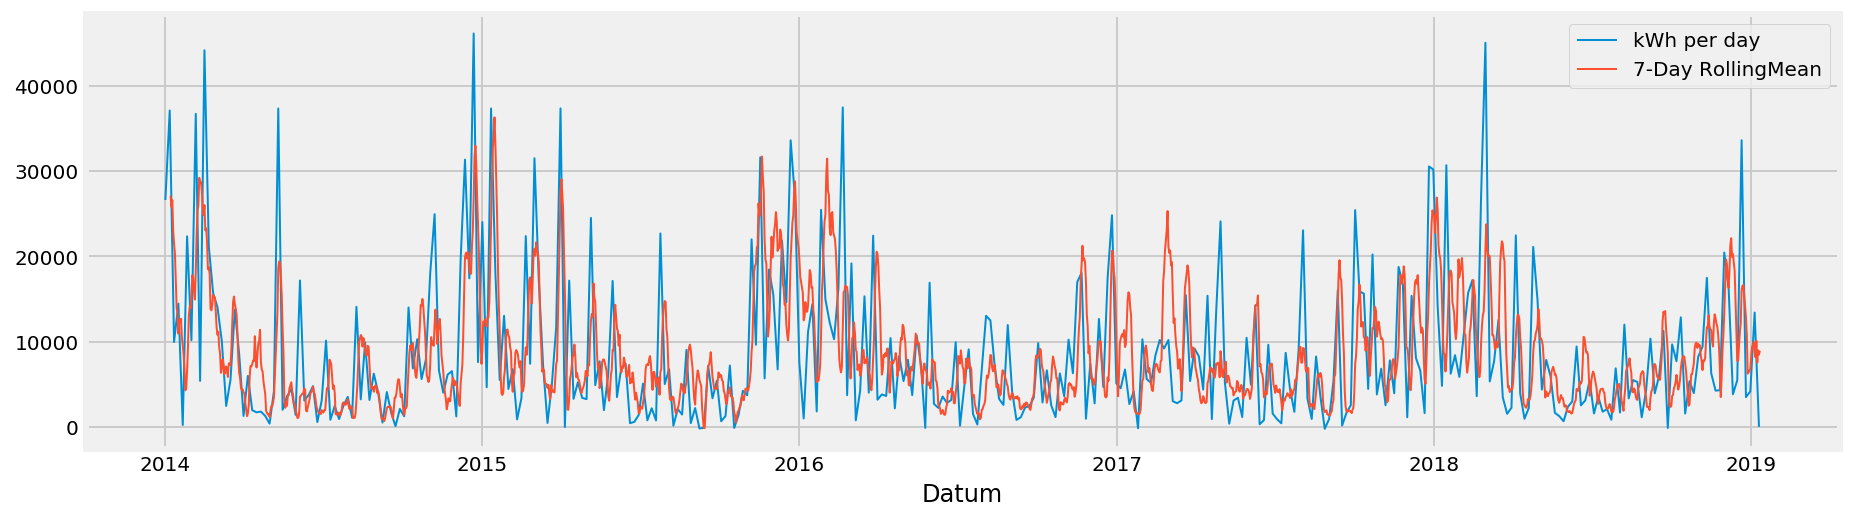

In [41]:
df['kWh'][::5].plot(figsize=(14,4), lw=1, label='kWh per day')
df['kWh'].rolling(window=7).mean().plot(lw=1,label='7-Day RollingMean')
plt.legend(loc='best');

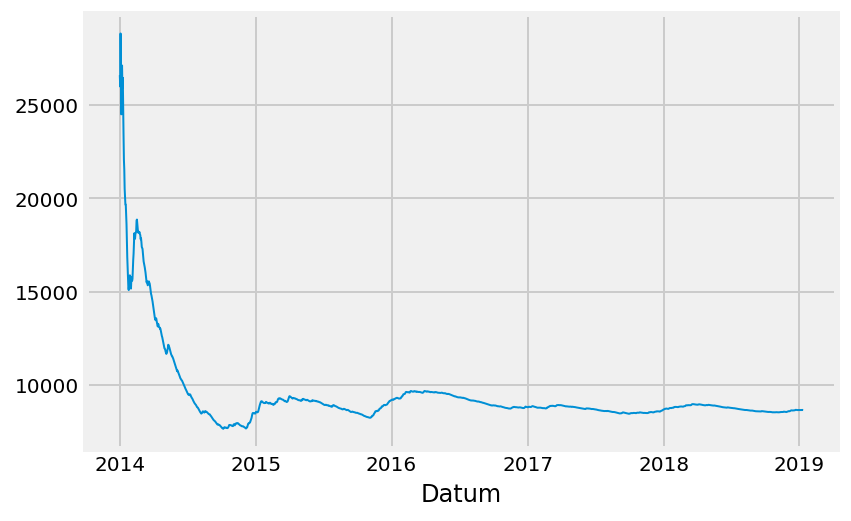

In [42]:
df['kWh'].expanding().mean().plot(lw=1,label='7-Day RollingMean');

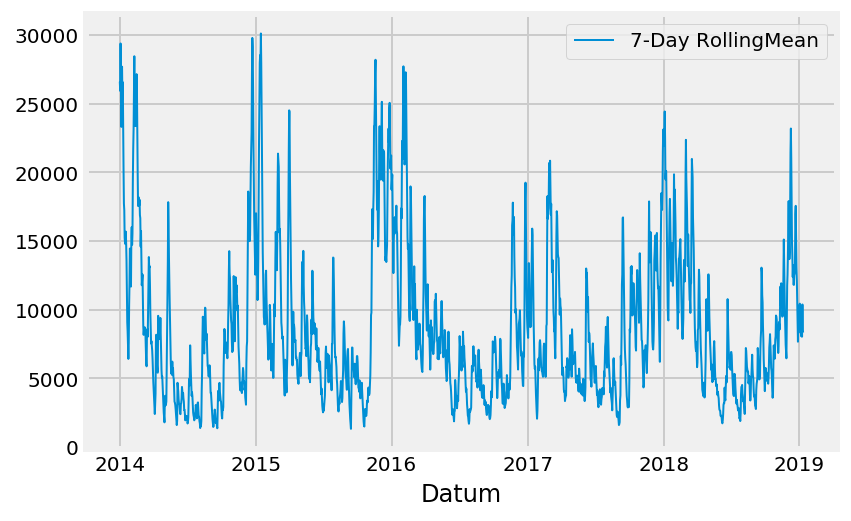

In [43]:
df['kWh'].ewm(span=10).mean().plot(lw=1,label='7-Day RollingMean')
plt.legend();

### Autocorrelation
In time series data, autocorrelation is a measure of how correlated a variable is with itself.
Specifically, autocorrelation measures how closely related earlier values are with values occurring later in time.
Examples of autocorrelation:
- In stock market data the stock price at one point is correlated with the stock price of the point directly prior in time.
- In sales data, sales on a Saturday are likely correlated with sales on the next Saturday and the previous Saturday, as well as other days to more or less extent.

In this example, of a wind generator, an autocorrelation within 1 or 2 lags at most may be expected. For wind occurring depends on frontal systems passing, typically these last 2 to 3 days.

<Figure size 864x504 with 0 Axes>

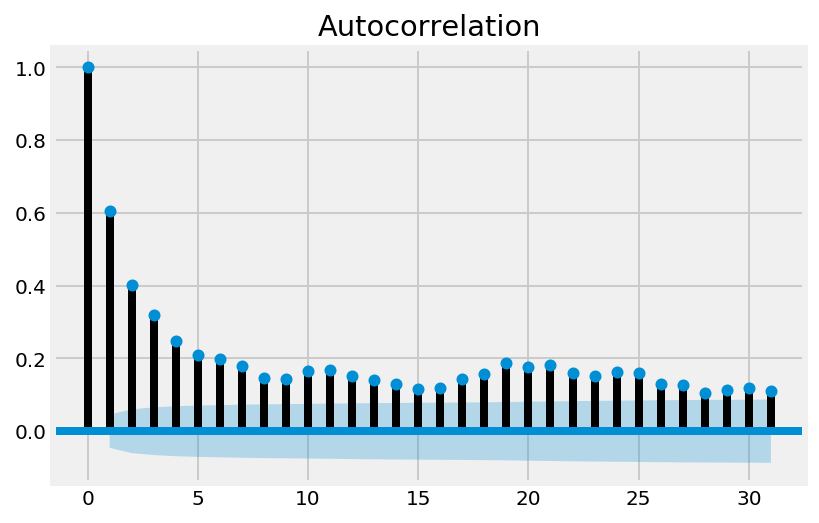

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
# so the statsmodels function creates the list of lags to calculate
# and does this for us, and includes a plotting function too

plt.figure(figsize=(12, 7))
plot_acf(df['kWh'].values, lags=31)
plt.show();

The blue shaded part joins the boundaries of an approximate 95% interval for the individual correlations assuming the series is independent. So if your data were white noise, about 5% of those autocorrelations would be expected to lie outside those bounds.

The blue band indicates confidence level bounds for the autocorrelations resulting from a true effect or just by chance.
With the default alpha=0.05 we are sure about any peak sticking out of the blue band that it indicates a true autocorrelation with a confidence level of 95 %. On the other hand, this means that we should expect that 5 % (i.e. one in twenty) of the peaks will be outside the blue band just by chance.

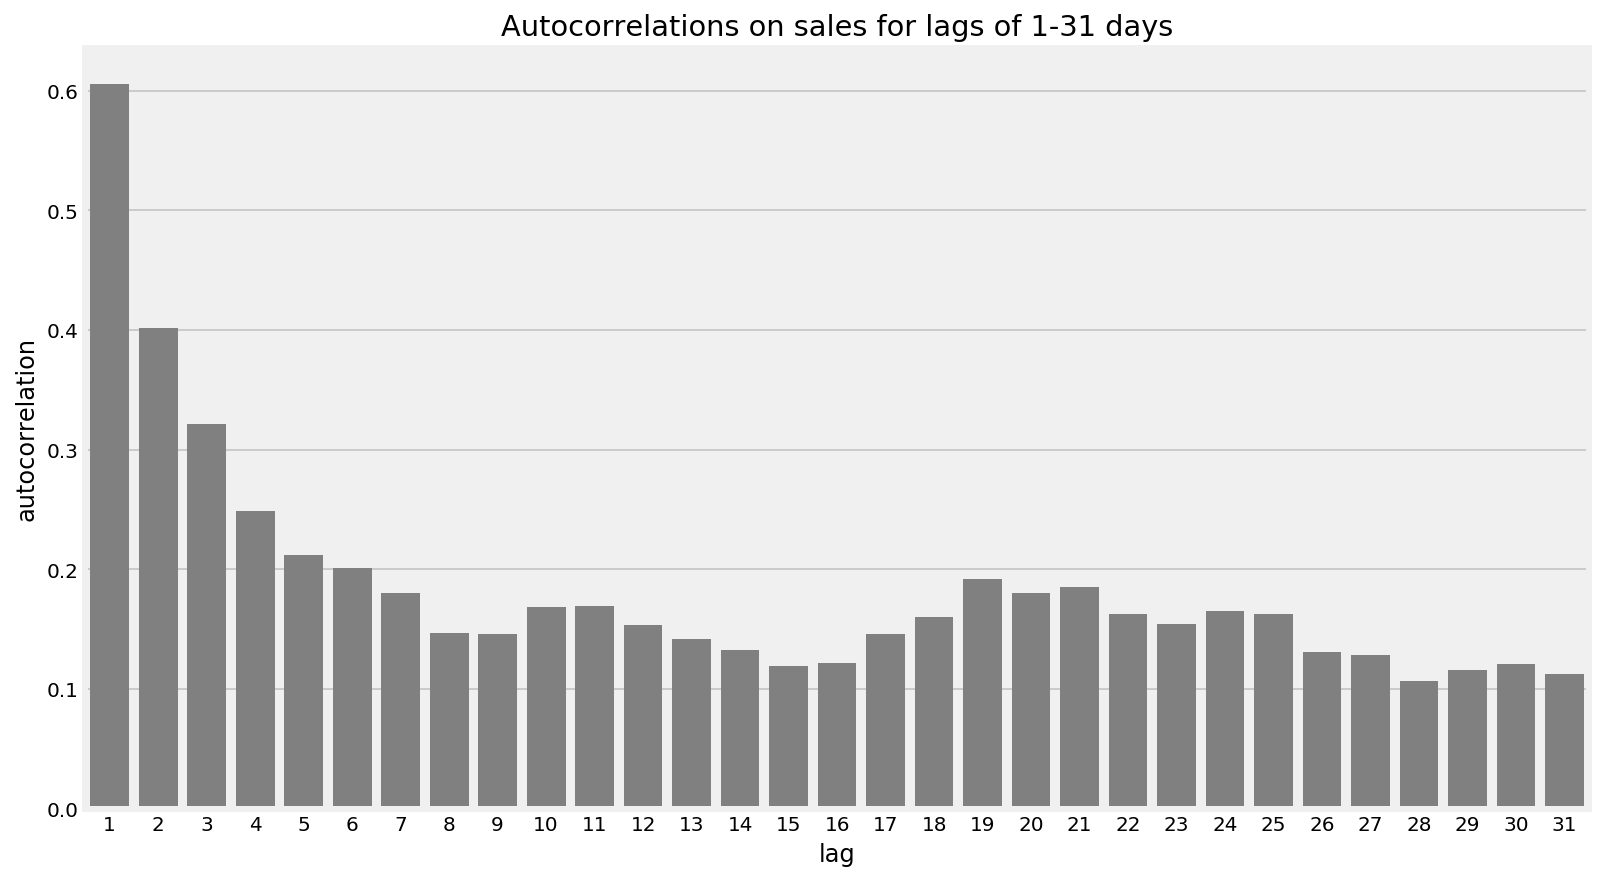

In [45]:
# calculating a range of autocorrelation lags 1-31 days and plotting

s1_autocorrelations = [df['kWh'].autocorr(lag=l) for l in range(1, 32)]
s1autocorr = pd.DataFrame(
    {'lag': list(range(1, 32)), 'autocorrelation': s1_autocorrelations})
plt.figure(figsize=(12, 7))
sns.barplot(x=s1autocorr.lag, y=s1autocorr.autocorrelation, color='grey')
plt.title("Autocorrelations on sales for lags of 1-31 days")
plt.show()

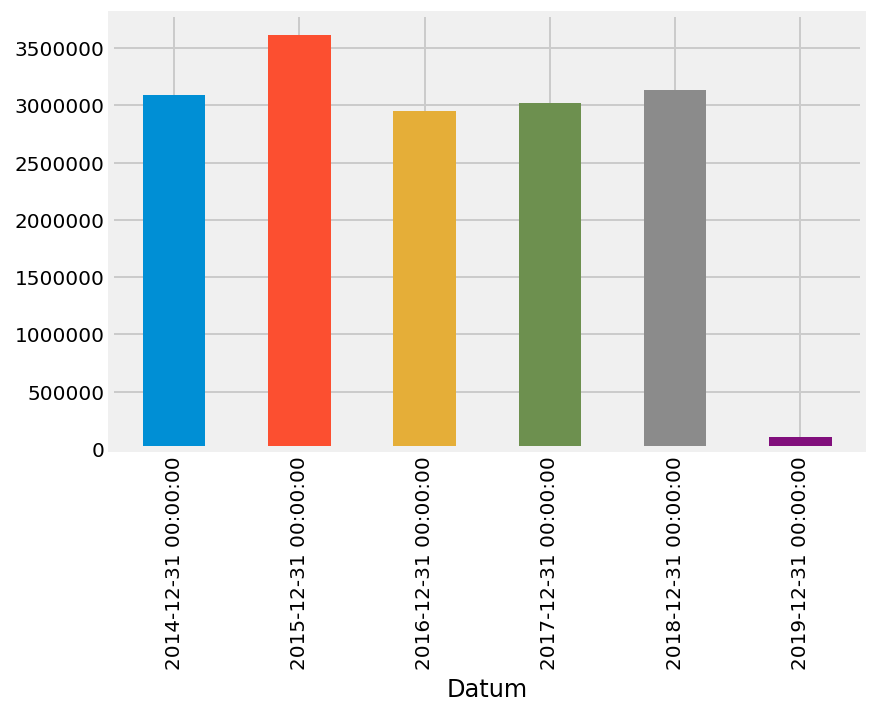

In [46]:
# resample = 
df['kWh'].resample('A-DEC').sum().plot(kind='bar');

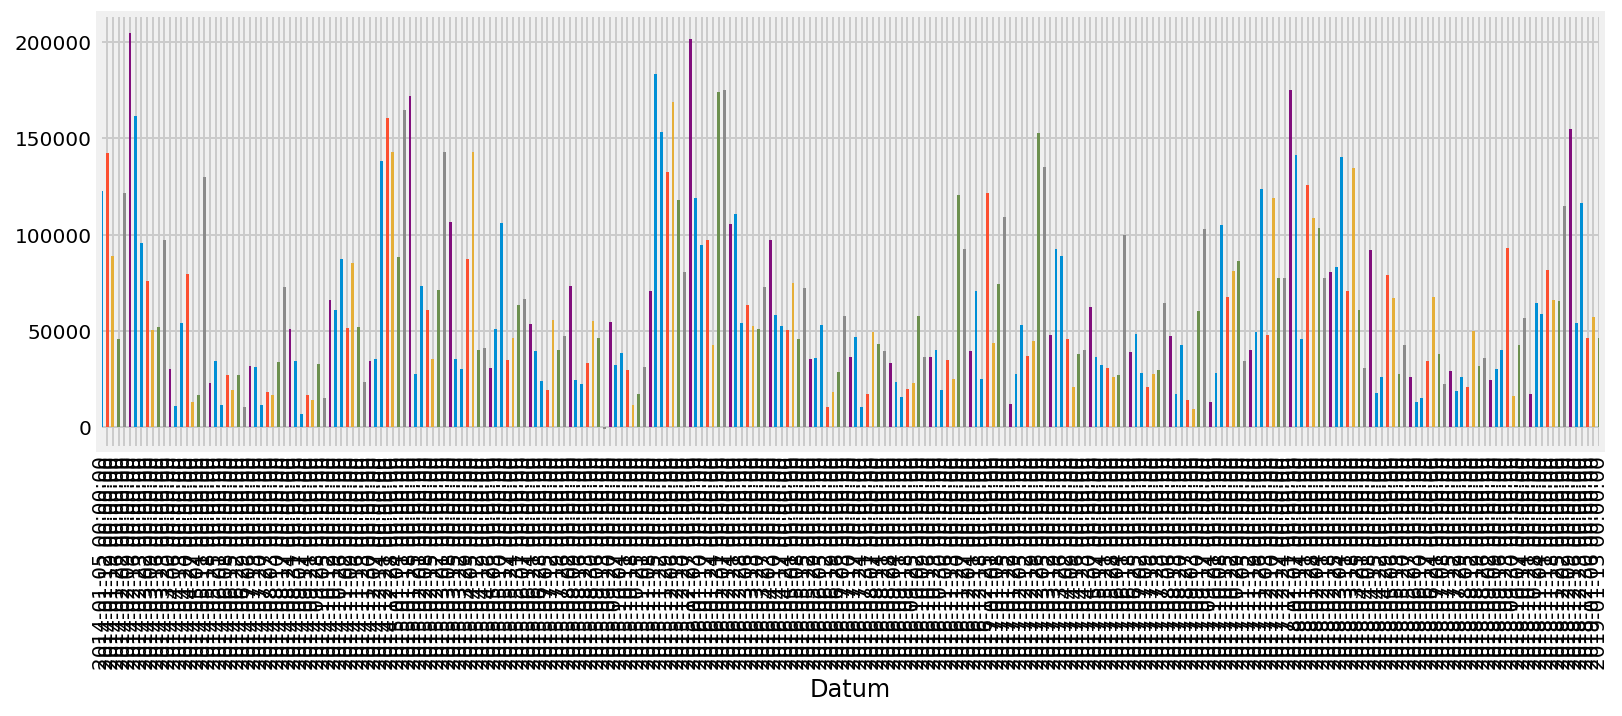

In [47]:
df['kWh'].resample('W-SUN').sum().plot(kind='bar', figsize = (12,4))

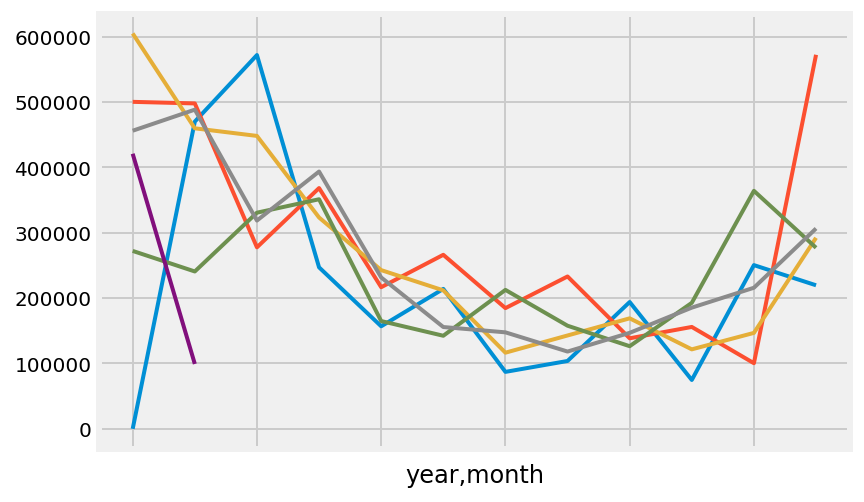

In [48]:
df['kWh'].groupby([df['year'], df['month']]).sum()[:12].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[12:24].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[24:36].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[36:48].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[48:60].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[60:72].plot(lw=2)

In [49]:
monthavg = df['kWh'].groupby(df['month']).sum()/6#[1:]
monthavg[1:]

month
1     376097.666667
2     324586.833333
3     280676.166667
4     168865.333333
5     165094.666667
6     124788.333333
7     125990.166667
8     129177.333333
9     121768.666667
10    179655.666667
11    278019.000000
12    375809.833333
Name: kWh, dtype: float64

In [50]:
df['kWh'].groupby([df['year'], df['month']]).sum()#[25:37]

year  month
0     0             0
2014  1        470159
      2        571993
      3        247140
      4        156932
      5        214113
      6         87172
      7        103852
      8        194042
      9         74764
      10       250545
      11       219682
      12       500397
2015  1        497986
      2        277759
      3        368446
      4        216755
      5        266324
      6        184736
      7        233170
      8        138550
      9        155924
      10       100437
      11       572415
      12       605012
2016  1        459899
      2        448260
      3        323400
      4        242887
      5        211903
                ...  
      8        169103
      9        121634
      10       146822
      11       292310
      12       272278
2017  1        240806
      2        330772
      3        351336
      4        164946
      5        142434
      6        212622
      7        157793
      8        126460
      9        19282

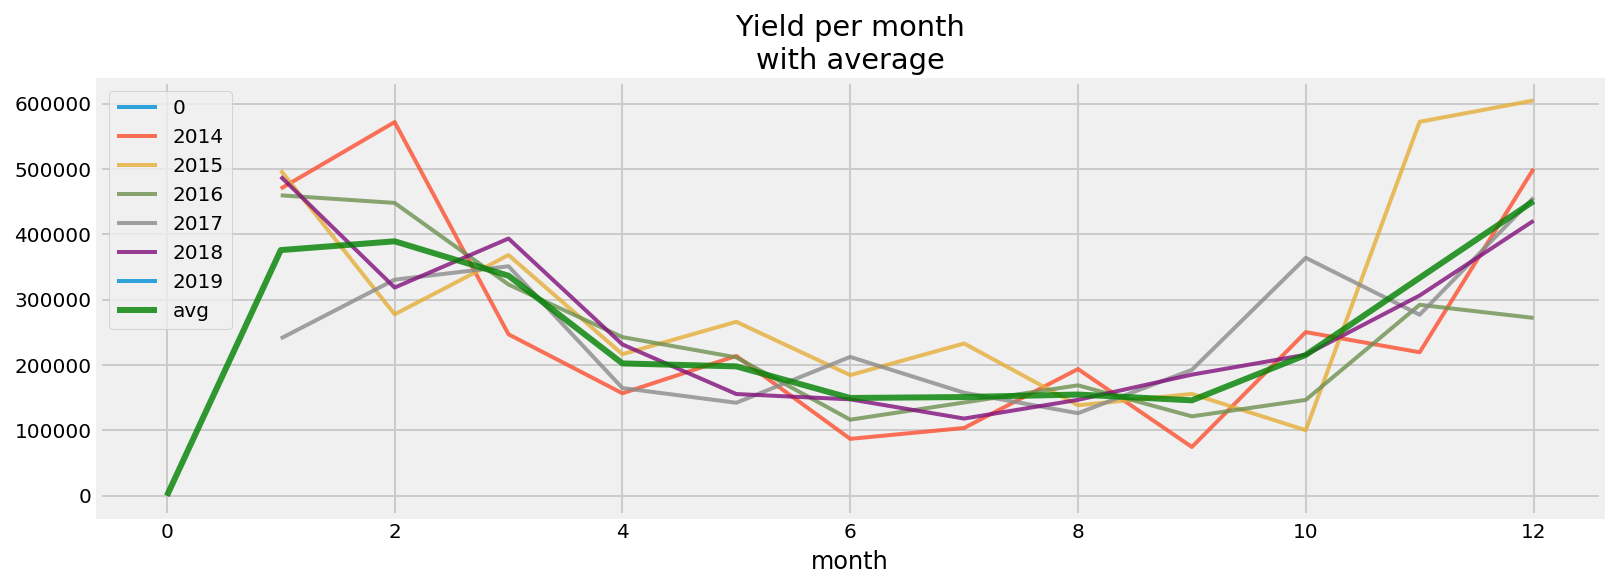

In [51]:
# ax, fig = plt.subplots(figsize=(12,4))
df['kWh'].groupby([df['month'], df['year']]).sum().unstack().plot(lw=2, figsize=(12,4), alpha=0.8)
df['kWh'].groupby([df['year'], df['month']]).sum().unstack().mean().plot(label='avg', color='G',lw=3, alpha=0.800)
plt.title('Yield per month\nwith average')
plt.legend()
plt.show();

### Partial autocorrelation and the partial autocorrelation function (PACF)
Another important chart to diagnose your timeseries is the partial autocorrelation chart (PACF). This is similar to the autocorrelation, but instead of just the correlation at increasing lags, it is the correlation at a given lag controlling for the effect of previous lags.


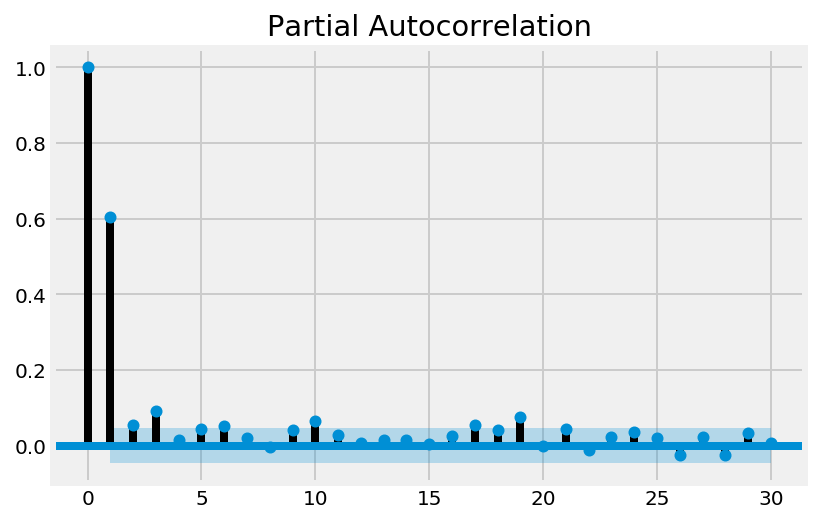

In [52]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['kWh'].values, lags=30)
plt.show()

In [53]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

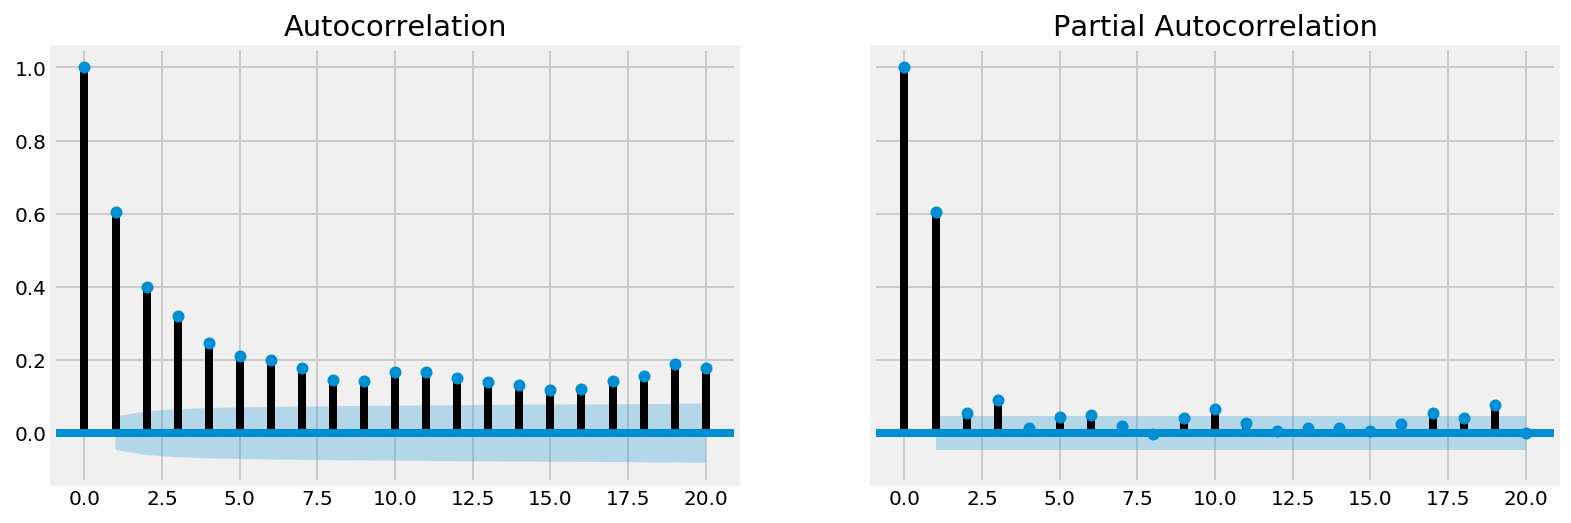

In [54]:
fig, ax = autocorr_plots(df['kWh'].values,lags=20)

### Differencing a time series and stationarity
 If a time series is stationary, the mean, variance, and covariance are unchanged by time shifts. Forecasting methods typically assume that the time series you are forecasting on are stationary, or at least approximately stationary.
 
 If a time series is not stationary, often it can be transformed to a stationary form. The most common way to make a time series stationary is to perform "differencing". This procedure converts a time series into the difference between consecutive values:
 
 Here, we will limit to inspection by eye to judge if a time series is stationary to a sufficient degree. There are also statistical tests available to check for stationarity, e.g.

- [(Augmented) Dickey-Fuller test]( https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)
 - [statsmodels implementation](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)
- [Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test](https://en.wikipedia.org/wiki/KPSS_test)
 - [statsmodels implementation](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html)

### Difference the unemployment rate and plot

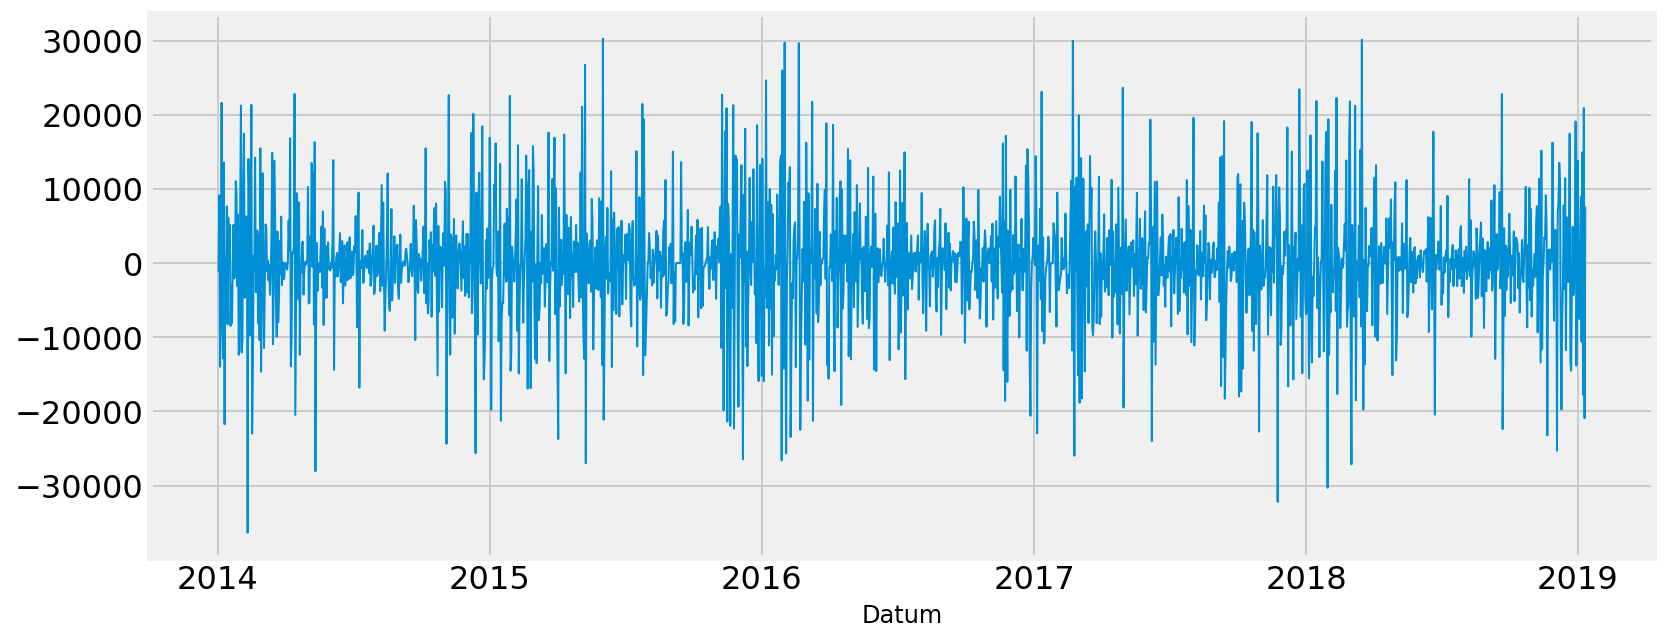

In [69]:
df['kWh_diff'] = df['kWh'].diff()
df['kWh_diff_diff'] = df['kWh'].diff().diff()
kWh = df['kWh']
kWhdiff = df['kWh_diff'][1:] #start at the second one as first is NaN
kWhdiffdiff = df['kWh_diff_diff'][2:]

df['kWh_diff'].plot(lw=1, figsize=(12, 5), fontsize=16)
plt.show()

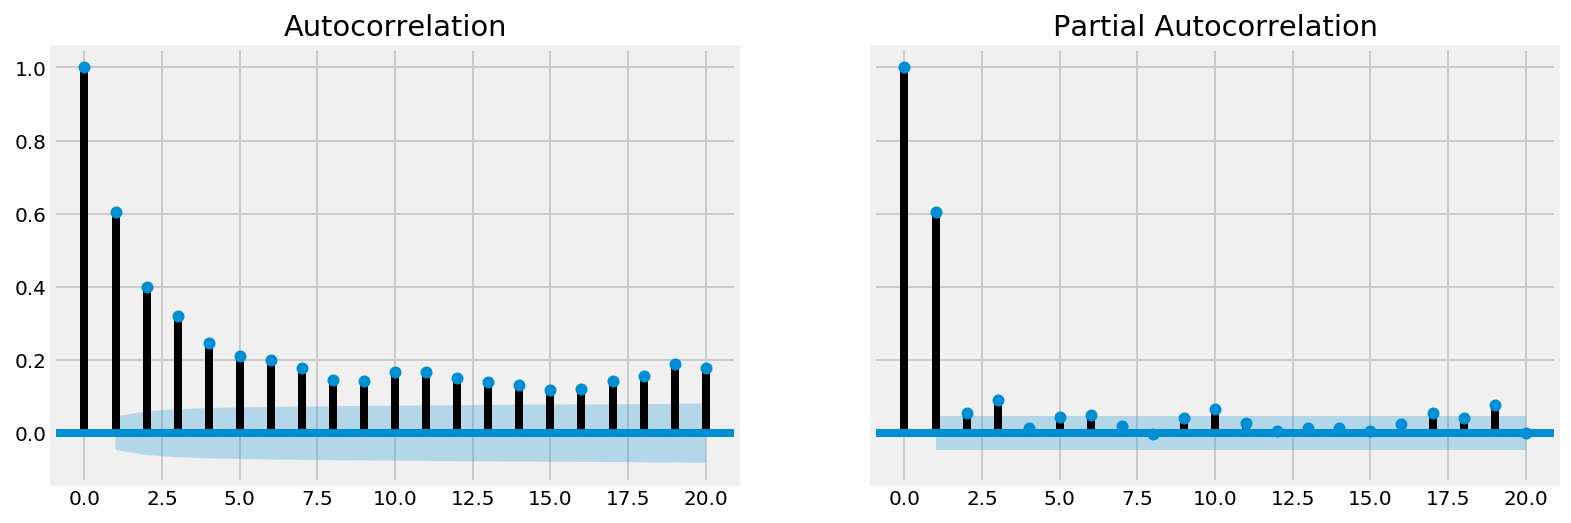

In [70]:
fig, ax = autocorr_plots(kWh,lags=20)

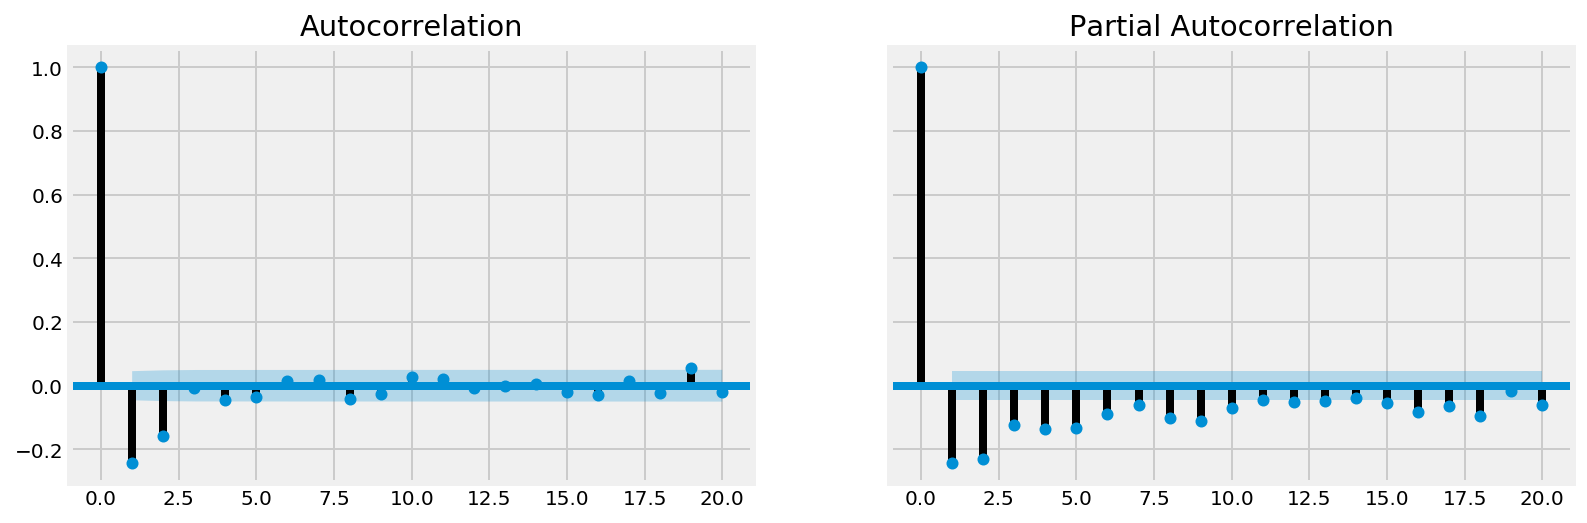

In [71]:
fig, ax = autocorr_plots(kWhdiff,lags=20)

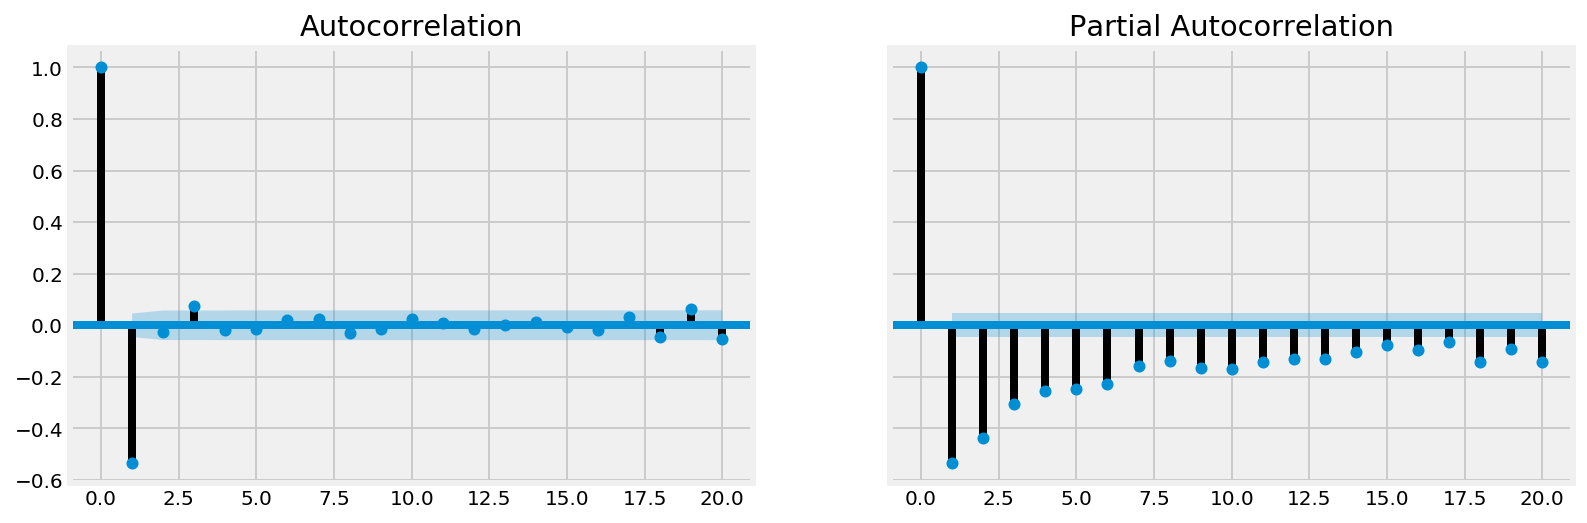

In [72]:
fig, ax = autocorr_plots(kWhdiffdiff,lags=20)

### White Noise

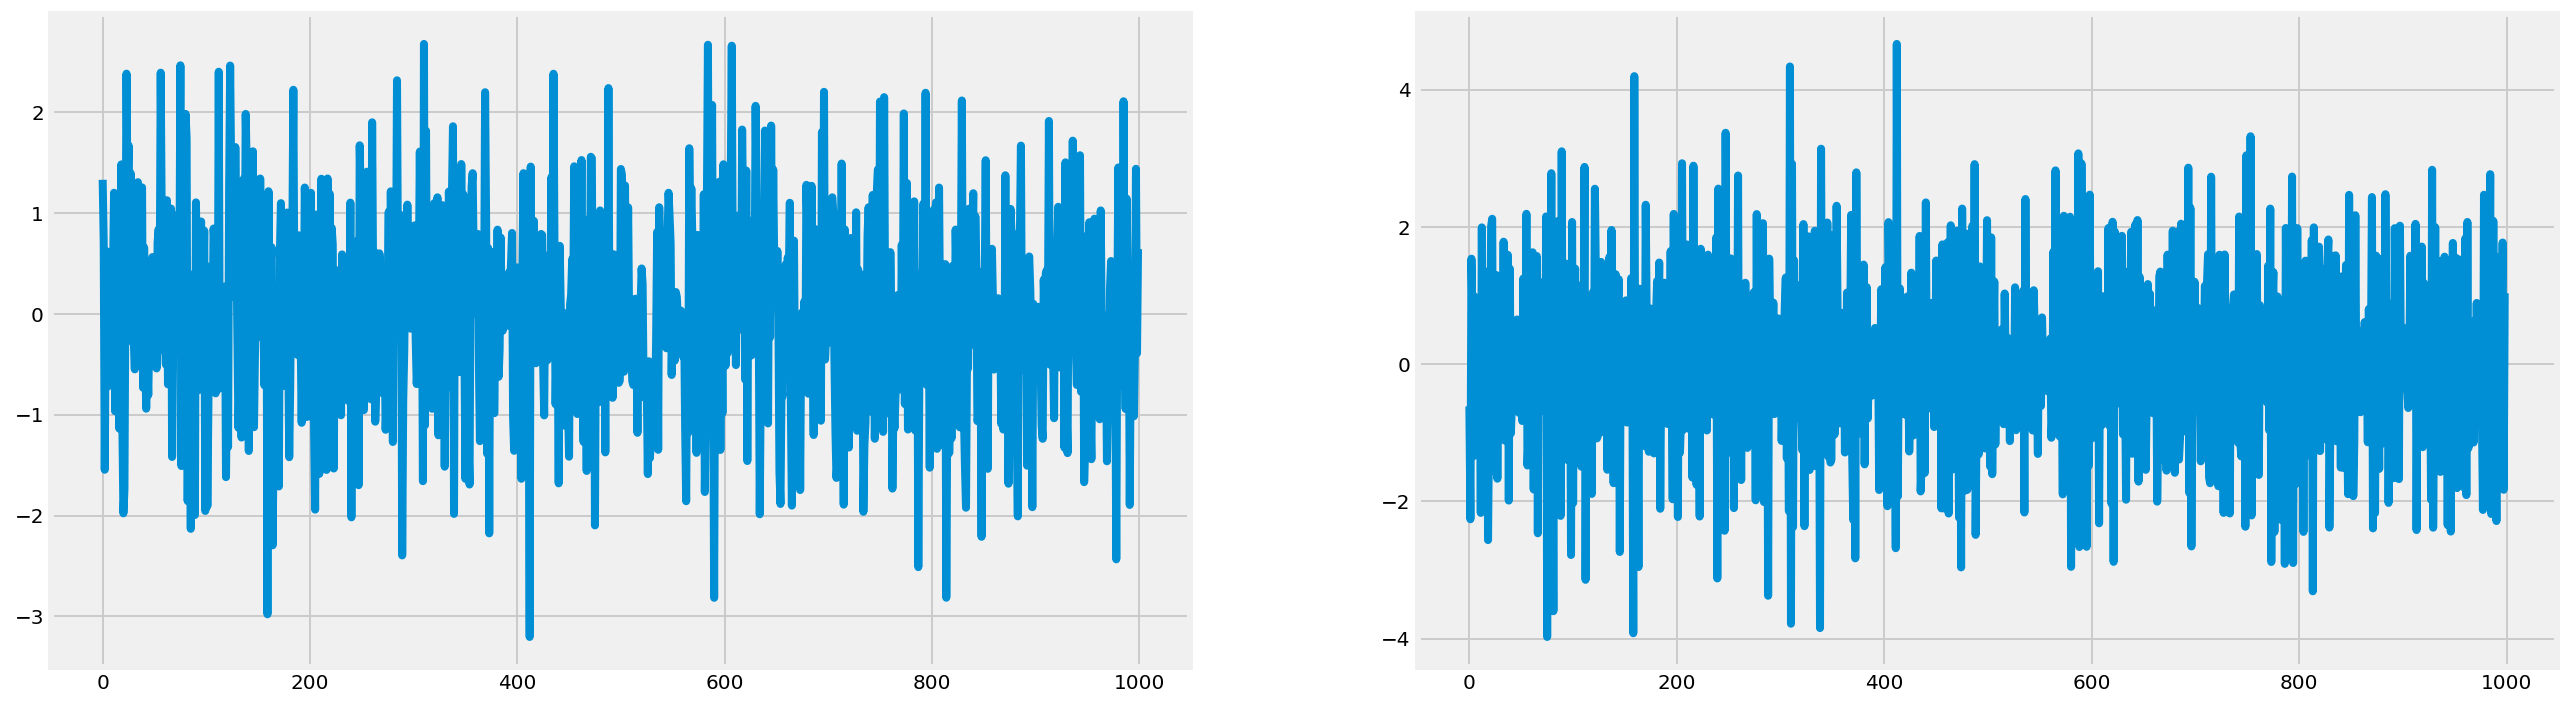

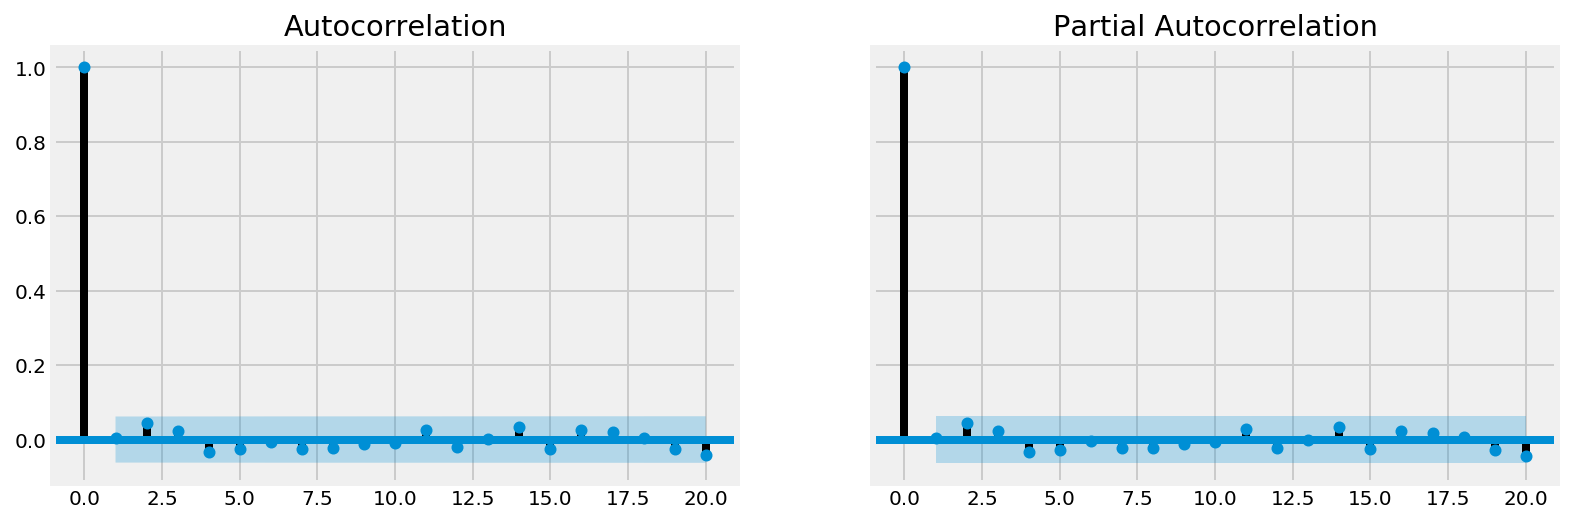

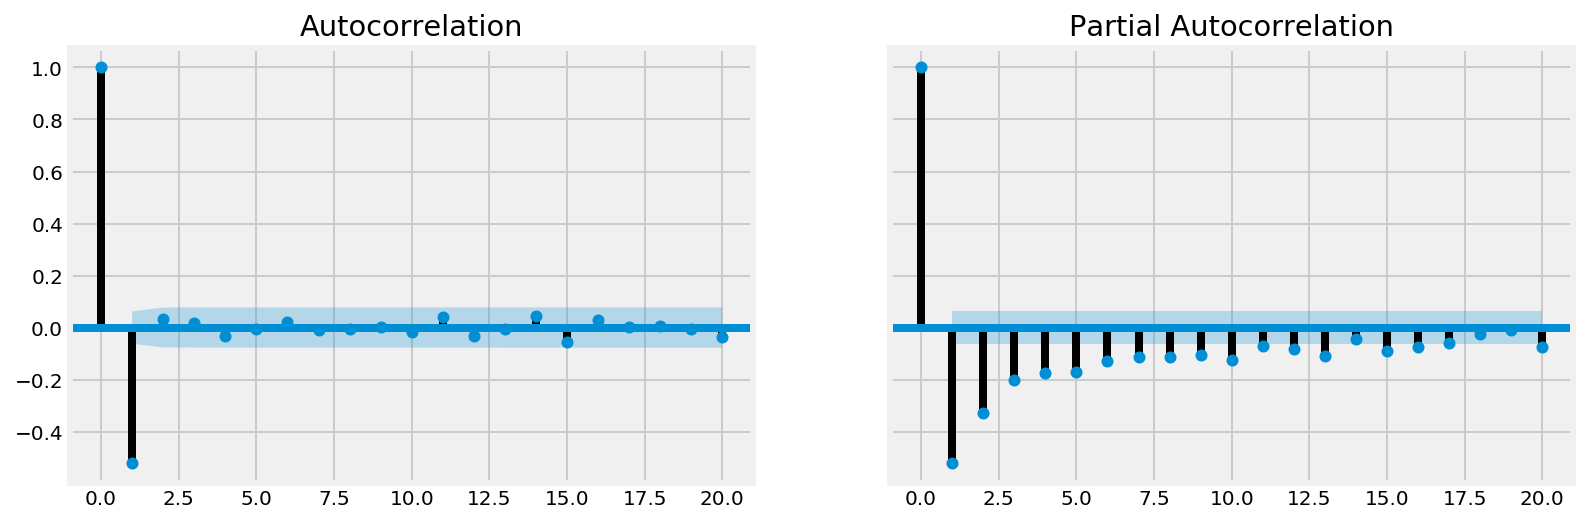

In [195]:
ts_len = 1000
np.random.seed(10)
sigma = 1
eps = sigma*np.random.randn(ts_len)
x = np.repeat(0,ts_len)
x = x.astype('float')

for t in range(ts_len):
    x[t] = eps[t]
    
    
fig,ax = plt.subplots(ncols=2,figsize=(20,6))
ax[0].plot(x)
ax[1].plot(np.diff(x,n=1))
plt.show()

fig, ax = autocorr_plots(x,lags=20)
fig, ax = autocorr_plots(np.diff(x),lags=20)

In [196]:
from statsmodels.tsa.arima_model import ARMA
ar = ARMA(kWhdiff, (2, 0)).fit(trend='nc')
# nc stands for having no constant trend
# alternative (default) is c for constant
# including a constant gives a convergence warning

ar.summary2() 
#use summary2 rather than summary to have properly formatted output

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 38006.2476
Dependent Variable: kWh              Log-Likelihood:      -18992.   
Date:               2019-02-02 17:03 Scale:               1.0000    
No. Observations:   1836             Method:              css-mle   
Df Model:           2                Sample:              01-10-2019
Df Residuals:       1834                                  01-01-2014
Converged:          1.0000           S.D. of innovations: 7518.781  
No. Iterations:     5.0000           HQIC:                37995.803 
AIC:                37989.7015                                      
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
ar.L1.kWh   -0.2857     0.0226   -12.6156   0.0000   -0.3301   -0.2413
ar.L2.kWh   -0.2411     0.0227   -10.6315   0.0000   -0.2855   -0.1966
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -0.5925            -1.9485           2.0366            -0.2970
AR.2           -0.5925             1.9485           2.0366             0.2970
====================================================================

"""

In [198]:
ma1 = ARMA(kWhdiff, (0, 1)).fit()
ma1.summary2()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 38020.0102
Dependent Variable: kWh              Log-Likelihood:      -18999.   
Date:               2019-02-02 17:06 Scale:               1.0000    
No. Observations:   1836             Method:              css-mle   
Df Model:           2                Sample:              01-10-2019
Df Residuals:       1834                                  01-01-2014
Converged:          1.0000           S.D. of innovations: 7546.861  
No. Iterations:     4.0000           HQIC:                38009.566 
AIC:                38003.4641                                      
---------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|     [0.025    0.975] 
---------------------------------------------------------------------
const        10.3279   93.5280    0.1104  0.9121  -172.9836  193.6393
ma.L1.kWh    -0.4692    0.0328  -14.3156  0.0000    -0.5335   -0.4050
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1            2.1311             0.0000           2.1311             0.0000
====================================================================

"""

In [201]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(kWhdiff,order=(2,1,1)).fit(trend='nc')
model.summary2()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [203]:
model = ARMA(kWhdiff,order=(2,3))
result = model.fit(start_params=[0,0,0,0,0],solver='lbfgs',method='mle',trend='nc',ic='BIC')
# without setting start_params it might not succeed in finding the MLE
# requires as many start_params as model parameters, i.e. p+q
result.summary2()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 37794.4687
Dependent Variable: kWh              Log-Likelihood:      -18875.   
Date:               2019-02-02 17:12 Scale:               1.0000    
No. Observations:   1836             Method:              mle       
Df Model:           5                Sample:              01-10-2019
Df Residuals:       1831                                  01-01-2014
Converged:          1.0000           S.D. of innovations: 7051.359  
No. Iterations:     37.0000          HQIC:                37773.580 
AIC:                37761.3766                                      
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
ar.L1.kWh     0.1878     0.2852    0.6584   0.5104   -0.3712    0.7467
ar.L2.kWh     0.2371     0.1366    1.7355   0.0828   -0.0307    0.5049
ma.L1.kWh    -0.6222     0.2847   -2.1852   0.0290   -1.1802   -0.0641
ma.L2.kWh    -0.4291     0.2513   -1.7079   0.0878   -0.9215    0.0633
ma.L3.kWh     0.0957     0.0482    1.9873   0.0470    0.0013    0.1902
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.6955             0.0000           1.6955             0.0000
AR.2           -2.4873             0.0000           2.4873             0.5000
MA.1            1.0371             0.0000           1.0371             0.0000
MA.2           -1.8884             0.0000           1.8884             0.5000
MA.3            5.3332             0.0000           5.3332             0.0000
====================================================================

"""

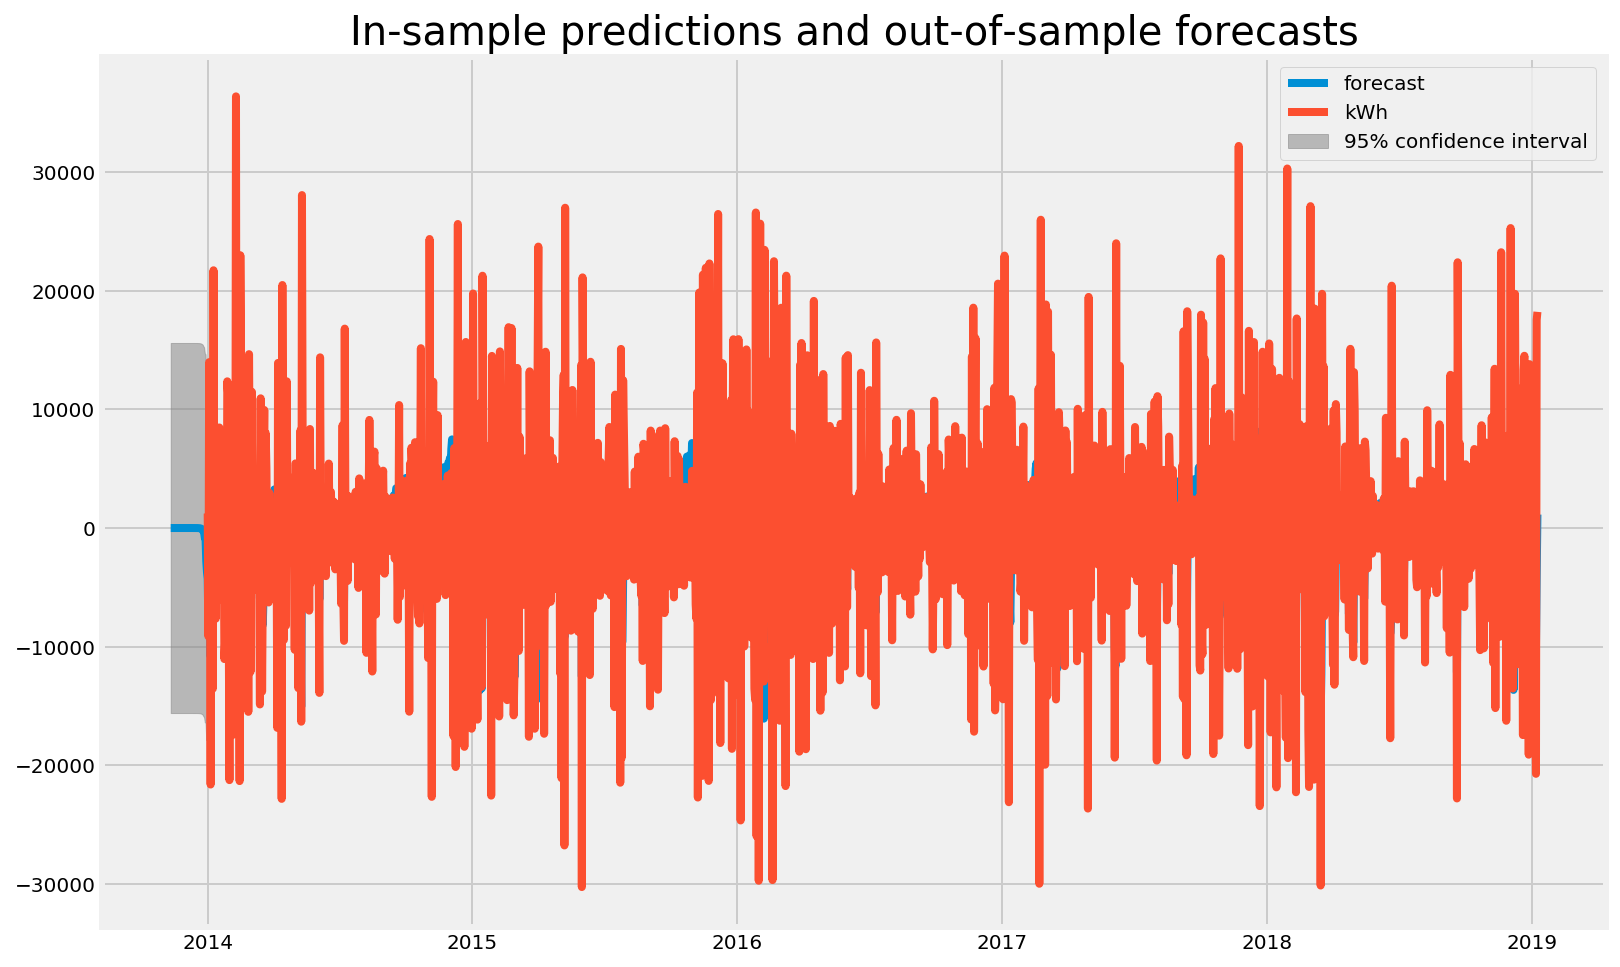

In [205]:
init_1 = 1
end_1 = len(kWhdiff)+50
fig, ax = plt.subplots(figsize=(12,8))
result.plot_predict(init_1,end_1,dynamic=False,plot_insample=True,ax=ax)
ax.set_title('In-sample predictions and out-of-sample forecasts',fontsize=20)
plt.show()